<a href="https://colab.research.google.com/github/RajarshiRay25/QSAR-ML-Model-on-Carbonic-Anhydrase-2-and-9/blob/main/Regression_on_CA_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CA 9 Inhibition activity QSAR Model Regression

In [1]:
# Import Initial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Upload CA 2 dataset

data = pd.read_csv('./CA9.csv')
data = data.dropna().drop_duplicates()
data.head()

,Molecule ChEMBL ID,Smiles,Standard Value
0,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,5330.0
1,CHEMBL280998,Oc1ccccc1O,115000.0
2,CHEMBL441343,O=C(O)c1ccc(O)cc1,3730.0
3,CHEMBL21,Nc1ccc(S(N)(=O)=O)cc1,294.0
4,CHEMBL51668,NS(=O)(=O)c1ccc(CCNC(=O)c2ccc(S(N)(=O)=O)cc2)cc1,18.0


In [ ]:
# Range of IC50 value

data['Standard Value'].describe()

,Standard Value
count,5.470000e+03
mean,2.588174e+05
std,6.015345e+06
min,1.200000e-01
25%,1.800000e+01
50%,7.100000e+01
75%,6.687500e+02
max,2.740000e+08


In [ ]:
# and IC50 values are in the 'Standard Value' column (in µM) - Processing the bioactivity


# Step 1: Convert IC50 from µM to M (if needed)
data['IC50_Molar'] = data['Standard Value'] * 1e-6  # Converting µM to M

# Step 2: Replace zero or negative IC50 values with a small positive number to avoid log10 errors
data['IC50_Molar'] = data['IC50_Molar'].replace(0, 1e-12)

# Step 3: Apply the pIC50 formula
data['pIC50'] = 9 - np.log10(data['IC50_Molar'])

In [ ]:
# Final Dataset

data.head()

,Molecule ChEMBL ID,Smiles,Standard Value,IC50_Molar,pIC50
0,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,5330.0,0.005330,11.273273
1,CHEMBL280998,Oc1ccccc1O,115000.0,0.115000,9.939302
2,CHEMBL441343,O=C(O)c1ccc(O)cc1,3730.0,0.003730,11.428291
3,CHEMBL21,Nc1ccc(S(N)(=O)=O)cc1,294.0,0.000294,12.531653
4,CHEMBL51668,NS(=O)(=O)c1ccc(CCNC(=O)c2ccc(S(N)(=O)=O)cc2)cc1,18.0,0.000018,13.744727


In [ ]:
# Save Transformed file - Stage 1

data.to_csv('processed_data.csv', index=False)

## Building Regression Models to develop prediction ML models to determine the pIC50 values of chemical candidates.

 - Using the above generated file, we obtain the descriptors from the PADEL Descriptors software which will be featurised in this ML model.

In [80]:
# Import ML libraries

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
regression_data = pd.read_csv('./CA9 descriptors qsar.csv')
# Replace NaN values with 0 - data preprocessing

regression_data = regression_data.fillna(0)
regression_data.head()

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Standard Value,IC50_Molar,pIC50
0,CHEMBL66879,1,-0.3390,0.114921,20.0274,23.580344,6,6,20,12,...,7.293479,7.293479,0.000000,223,12,1.886,54,5330.0,0.005330,11.273273
1,CHEMBL280998,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,8,...,4.978279,4.978279,0.000000,60,8,1.299,36,115000.0,0.115000,9.939302
2,CHEMBL441343,1,-0.7001,0.490140,9.7839,18.726758,6,6,16,10,...,7.326862,7.326862,0.000000,120,11,1.070,46,3730.0,0.003730,11.428291
3,CHEMBL21,0,-1.6864,2.843945,15.3637,22.598344,6,6,19,11,...,12.878006,4.747582,4.882843,152,13,-0.150,54,294.0,0.000294,12.531653
4,CHEMBL51668,0,-2.2406,5.020288,38.8887,50.845481,12,12,42,25,...,26.365603,12.073114,7.775098,1858,36,0.624,128,18.0,0.000018,13.744727


In [82]:
regression_data.columns

Index(['Name', 'nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom',
       'nAromBond', 'nAtom', 'nHeavyAtom',
       ...
       'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH', 'WPOL', 'XLogP', 'Zagreb',
       'Standard Value', 'IC50_Molar', 'pIC50'],
      dtype='object', length=1448)

In [83]:
# Perform outlier processing and statistical operations to filter the dataset

regression_data = regression_data.drop(['Name'], axis=1)
regression_data.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Standard Value,IC50_Molar,pIC50
0,1,-0.3390,0.114921,20.0274,23.580344,6,6,20,12,8,...,7.293479,7.293479,0.000000,223,12,1.886,54,5330.0,0.005330,11.273273
1,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,8,6,...,4.978279,4.978279,0.000000,60,8,1.299,36,115000.0,0.115000,9.939302
2,1,-0.7001,0.490140,9.7839,18.726758,6,6,16,10,6,...,7.326862,7.326862,0.000000,120,11,1.070,46,3730.0,0.003730,11.428291
3,0,-1.6864,2.843945,15.3637,22.598344,6,6,19,11,8,...,12.878006,4.747582,4.882843,152,13,-0.150,54,294.0,0.000294,12.531653
4,0,-2.2406,5.020288,38.8887,50.845481,12,12,42,25,17,...,26.365603,12.073114,7.775098,1858,36,0.624,128,18.0,0.000018,13.744727


In [84]:
# Ensure pIC50 is retained by setting aside before filtering
pIC50 = regression_data["pIC50"]  # Store pIC50 separately
features_only = regression_data.drop(columns=['pIC50'])  # Drop pIC50 temporarily

In [85]:
# Variance Threshold

from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=0.1)

In [86]:
def variance_threshold_selector(data, threshold=0.15):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [87]:
# Filter the dataset with only high variance data

regression_data_HV = variance_threshold_selector(features_only)

In [88]:
regression_data_HV.head()

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Standard Value,IC50_Molar
0,-0.3390,0.114921,20.0274,23.580344,6,6,20,12,8,9,...,23.396041,7.293479,7.293479,0.000000,223,12,1.886,54,5330.0,0.005330
1,-0.9206,0.847504,5.1292,16.164758,6,6,14,8,6,6,...,15.533410,4.978279,4.978279,0.000000,60,8,1.299,36,115000.0,0.115000
2,-0.7001,0.490140,9.7839,18.726758,6,6,16,10,6,7,...,19.385708,7.326862,7.326862,0.000000,120,11,1.070,46,3730.0,0.003730
3,-1.6864,2.843945,15.3637,22.598344,6,6,19,11,8,6,...,21.156620,12.878006,4.747582,4.882843,152,13,-0.150,54,294.0,0.000294
4,-2.2406,5.020288,38.8887,50.845481,12,12,42,25,17,15,...,49.380146,26.365603,12.073114,7.775098,1858,36,0.624,128,18.0,0.000018


In [89]:
regression_data_HV = pd.concat([regression_data_HV, pIC50], axis=1)

In [90]:
regression_data_HV.head()

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Standard Value,IC50_Molar,pIC50
0,-0.3390,0.114921,20.0274,23.580344,6,6,20,12,8,9,...,7.293479,7.293479,0.000000,223,12,1.886,54,5330.0,0.005330,11.273273
1,-0.9206,0.847504,5.1292,16.164758,6,6,14,8,6,6,...,4.978279,4.978279,0.000000,60,8,1.299,36,115000.0,0.115000,9.939302
2,-0.7001,0.490140,9.7839,18.726758,6,6,16,10,6,7,...,7.326862,7.326862,0.000000,120,11,1.070,46,3730.0,0.003730,11.428291
3,-1.6864,2.843945,15.3637,22.598344,6,6,19,11,8,6,...,12.878006,4.747582,4.882843,152,13,-0.150,54,294.0,0.000294,12.531653
4,-2.2406,5.020288,38.8887,50.845481,12,12,42,25,17,15,...,26.365603,12.073114,7.775098,1858,36,0.624,128,18.0,0.000018,13.744727


In [91]:
# Perform correlation analysis now to assess the highly correlated features which we will remove

correlated_features = set()
corr_matrix = regression_data_HV.corr()

In [92]:
# Highly correlated features

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

In [93]:
correlated_features

{'AATS0s',
 'AATS1v',
 'AATS2e',
 'AATS2i',
 'AATS2s',
 'AATS2v',
 'AATS3v',
 'AATS4i',
 'AATS4m',
 'AATS4v',
 'AATS5i',
 'AATS5m',
 'AATS5v',
 'AATS6i',
 'AATS6v',
 'AATS7i',
 'AATS7v',
 'AATS8i',
 'AATS8v',
 'AATSC0c',
 'AATSC0i',
 'AATSC0m',
 'AATSC0s',
 'AATSC1c',
 'AATSC1s',
 'AATSC2v',
 'AATSC3v',
 'AMW',
 'ATS0e',
 'ATS0i',
 'ATS0p',
 'ATS0v',
 'ATS1e',
 'ATS1i',
 'ATS1m',
 'ATS1p',
 'ATS1s',
 'ATS1v',
 'ATS2e',
 'ATS2i',
 'ATS2m',
 'ATS2p',
 'ATS2s',
 'ATS2v',
 'ATS3e',
 'ATS3i',
 'ATS3m',
 'ATS3p',
 'ATS3s',
 'ATS3v',
 'ATS4e',
 'ATS4i',
 'ATS4m',
 'ATS4p',
 'ATS4s',
 'ATS4v',
 'ATS5e',
 'ATS5i',
 'ATS5m',
 'ATS5p',
 'ATS5s',
 'ATS5v',
 'ATS6e',
 'ATS6i',
 'ATS6m',
 'ATS6p',
 'ATS6s',
 'ATS6v',
 'ATS7e',
 'ATS7i',
 'ATS7m',
 'ATS7p',
 'ATS7s',
 'ATS7v',
 'ATS8e',
 'ATS8i',
 'ATS8m',
 'ATS8p',
 'ATS8s',
 'ATS8v',
 'ATSC0e',
 'ATSC0i',
 'ATSC0m',
 'ATSC0p',
 'ATSC0s',
 'ATSC0v',
 'ATSC1c',
 'ATSC2c',
 'ATSC2p',
 'ATSC2s',
 'ATSC3s',
 'ATSC4c',
 'ATSC4p',
 'ATSC4s',
 'ATSC5c',
 '

In [94]:
# Remove highly correlated
def remove_correlated_features(features,data):
  for x in features:
    data.drop(x,axis=1,inplace=True)
  return data

In [95]:
regression_data_HV_corr = remove_correlated_features(correlated_features,regression_data_HV)

In [96]:
regression_data_HV_corr.head()

,ALogP,ALogp2,AMR,apol,naAromAtom,nN,nO,nS,nF,nCl,...,R_TpiPCTPC,n5Ring,nFRing,nF9Ring,nF10Ring,nHeteroRing,n6HeteroRing,LipinskiFailures,Standard Value,pIC50
0,-0.3390,0.114921,20.0274,23.580344,6,0,3,0,0,0,...,5.552246,0,0,0,0,0,0,0,5330.0,11.273273
1,-0.9206,0.847504,5.1292,16.164758,6,0,2,0,0,0,...,3.498488,0,0,0,0,0,0,0,115000.0,9.939302
2,-0.7001,0.490140,9.7839,18.726758,6,0,3,0,0,0,...,3.908602,0,0,0,0,0,0,0,3730.0,11.428291
3,-1.6864,2.843945,15.3637,22.598344,6,2,2,1,0,0,...,4.246591,0,0,0,0,0,0,0,294.0,12.531653
4,-2.2406,5.020288,38.8887,50.845481,12,3,5,2,0,0,...,4.642021,0,0,0,0,0,0,0,18.0,13.744727


In [97]:
# Implement Z score method to obtain samples with proper standard distribution and remove outlier samples

from scipy import stats
import numpy as np

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(regression_data_HV_corr['pIC50']))

# Set a threshold to identify outliers
threshold = 2  # Standard practice is to remove points with |Z| > 3

# Filter out the rows where Z-score is greater than the threshold
regression_data_HV_new = regression_data_HV_corr[(z_scores < threshold)]

print(f"Original dataset size: {regression_data_HV.shape}")
print(f"Dataset size after removing outliers: {regression_data_HV_new.shape}")

Original dataset size: (5025, 217)
Dataset size after removing outliers: (4708, 217)


In [98]:
X = regression_data_HV_new.drop(['pIC50'], axis=1)
y = regression_data_HV_new.pIC50

In [99]:
X.head()

,ALogP,ALogp2,AMR,apol,naAromAtom,nN,nO,nS,nF,nCl,...,MLFER_BH,R_TpiPCTPC,n5Ring,nFRing,nF9Ring,nF10Ring,nHeteroRing,n6HeteroRing,LipinskiFailures,Standard Value
0,-0.3390,0.114921,20.0274,23.580344,6,0,3,0,0,0,...,0.777,5.552246,0,0,0,0,0,0,0,5330.0
2,-0.7001,0.490140,9.7839,18.726758,6,0,3,0,0,0,...,0.755,3.908602,0,0,0,0,0,0,0,3730.0
3,-1.6864,2.843945,15.3637,22.598344,6,2,2,1,0,0,...,0.566,4.246591,0,0,0,0,0,0,0,294.0
4,-2.2406,5.020288,38.8887,50.845481,12,3,5,2,0,0,...,1.191,4.642021,0,0,0,0,0,0,0,18.0
6,-1.2425,1.543806,39.7623,50.735688,12,3,5,2,1,0,...,0.782,4.116748,0,0,0,0,0,0,0,68.4


In [100]:
y.head()

,pIC50
0,11.273273
2,11.428291
3,12.531653
4,13.744727
6,13.164944


In [101]:
# Create Train-Test split partition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Perform SVR Model

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [103]:
SVR_pipeline = make_pipeline(StandardScaler(),SVR(kernel='rbf', C=0.6))
SVR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=0.6))])

In [104]:
predictions_train = SVR_pipeline.predict(X_train)

predictions_test = SVR_pipeline.predict(X_test)

In [105]:
mean_absolute_error(y_train, predictions_train)

0.3796870399262864

In [106]:
mean_absolute_error(y_test, predictions_test)

0.5205982470321259

In [107]:
np.sqrt(mean_squared_error(y_test, predictions_test))

0.6726391325557504

In [108]:
np.sqrt(mean_squared_error(y_train, predictions_train))

0.5192064132754165

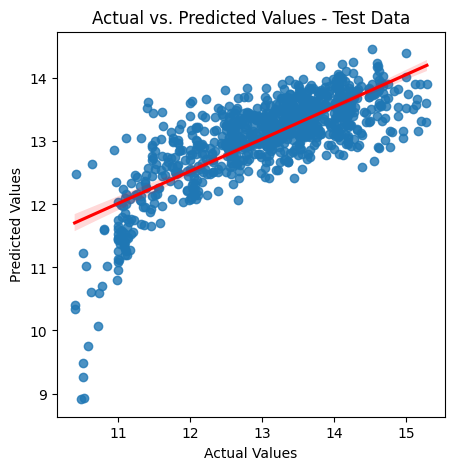

In [109]:
# Create a scatter plot with a regression line using seaborn
plt.figure(figsize=(5, 5))
sns.regplot(x=y_test, y=predictions_test, line_kws={"color": "red"})

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Test Data')

# Show the plot
plt.show()

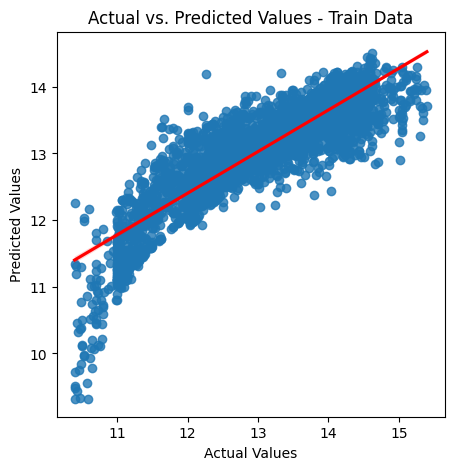

In [110]:
plt.figure(figsize=(5, 5))
sns.regplot(x=y_train, y=predictions_train, line_kws={"color": "red"})

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Train Data')

plt.show()

In [111]:
SVR_pipeline.score(X_train, y_train)

0.7284239310513098

In [112]:
SVR_pipeline.score(X_test, y_test)

0.5782566397094718

In [113]:
r2 = r2_score(y_test, predictions_test)
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)

print(f"R² Score (Test Data): {r2}")
print(f"Mean Absolute Error (MAE) Test Data: {mae}")
print(f"Mean Squared Error (MSE) Test Data: {mse}")

R² Score (Test Data): 0.5782566397094718
Mean Absolute Error (MAE) Test Data: 0.5205982470321259
Mean Squared Error (MSE) Test Data: 0.45244340264535227


In [114]:
r2_tr = r2_score(y_train, predictions_train)
mae_tr = mean_absolute_error(y_train, predictions_train)
mse_tr = mean_squared_error(y_train, predictions_train)

print(f"R² Score (Train Data): {r2_tr}")
print(f"Mean Absolute Error (MAE) Train Data: {mae_tr}")
print(f"Mean Squared Error (MSE) Train Data: {mse_tr}")

R² Score (Train Data): 0.7284239310513098
Mean Absolute Error (MAE) Train Data: 0.3796870399262864
Mean Squared Error (MSE) Train Data: 0.2695752995863226


In [115]:
# Performing Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [116]:
# Initialize RandomForest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=500,          # Number of trees in the forest
    random_state=42,           # Seed for reproducibility
    max_depth=40,              # Maximum depth of each tree
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    oob_score=True,            # Out-of-bag samples to estimate generalization error
    n_jobs=-1,                 # Number of jobs to run in parallel (-1 uses all processors)
    verbose=1                  # Verbose level for monitoring
)

# Train the model
rf_regressor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.6s finished


RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=1)

In [117]:
# Make predictions on the test data
y_pred_test = rf_regressor.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


In [118]:
# Make predictions on the test data
y_pred_train = rf_regressor.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished


In [119]:
# Calculate regression metrics
r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)

# Display metrics
print(f"R² (R-squared) Test Data: {r2}")
print(f"Mean Absolute Error (MAE) Test Data: {mae}")
print(f"Mean Squared Error (MSE) Test Data: {mse}")

R² (R-squared) Test Data: 0.8058997100565582
Mean Absolute Error (MAE) Test Data: 0.32222772427133284
Mean Squared Error (MSE) Test Data: 0.20822946821489663


In [120]:
# Calculate regression metrics
r2_tr = r2_score(y_train, y_pred_train)
mse_tr = mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_train, y_pred_train)

# Display metrics
print(f"R² (R-squared) Train Data: {r2_tr}")
print(f"Mean Absolute Error (MAE) Train Data: {mae_tr}")
print(f"Mean Squared Error (MSE) Train Data: {mse_tr}")

R² (R-squared) Train Data: 0.956055304456064
Mean Absolute Error (MAE) Train Data: 0.14151929781741218
Mean Squared Error (MSE) Train Data: 0.043620943893714195


Text(0.5, 1.0, 'Actual vs. Predicted Values QSAR - Test Data')

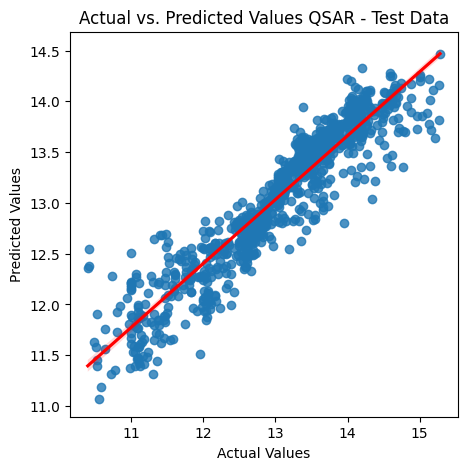

In [121]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_test, y=y_pred_test, line_kws={"color": "red"})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values QSAR - Test Data')

Text(0.5, 1.0, 'Actual vs. Predicted Values QSAR - Train Data')

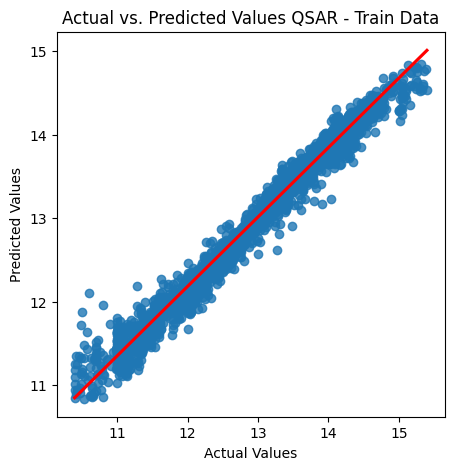

In [122]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_train, y=y_pred_train, line_kws={"color": "red"})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values QSAR - Train Data')

In [123]:
# Using Cross Validation at K Folds

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Define the Random Forest model with additional hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=500,          # Number of trees in the forest
    random_state=42,           # Seed for reproducibility
    max_depth=10,              # Maximum depth of each tree
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    oob_score=True,            # Out-of-bag samples to estimate generalization error
    n_jobs=-1,                 # Number of jobs to run in parallel (-1 uses all processors)
    verbose=1                  # Verbose level for monitoring
)

# Define a 5-fold cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate with different metrics
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation with different scorers
mse_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring=mse_scorer, n_jobs=-1)
mae_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring=mae_scorer, n_jobs=-1)
r2_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring=r2_scorer, n_jobs=-1)

# Fit the model on the entire training data
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)
y_pred_train = rf_regressor.predict(X_train)

# Compute metrics on test data
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


# Compute metrics on train data
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.4s finis

In [124]:
# Display the cross-validation and test results
print(f"Cross-Validated MSE: {mse_scores.mean()} ± {mse_scores.std()}")
print(f"Cross-Validated MAE: {mae_scores.mean()} ± {mae_scores.std()}")
print(f"Cross-Validated R²: {r2_scores.mean()} ± {r2_scores.std()}")
print(f"Test Set MSE: {mse_test}")
print(f"Test Set MAE: {mae_test}")
print(f"Test Set R²: {r2_test}")
print("------------------------------------")
print(f"Train Set MSE: {mse_train}")
print(f"Train Set MAE: {mae_train}")
print(f"Train Set R²: {r2_train}")

Cross-Validated MSE: 0.30007150407328204 ± 0.017432634736264056
Cross-Validated MAE: 0.4032290285285664 ± 0.011301970018040577
Cross-Validated R²: 0.7026363693629072 ± 0.009107849760910424
Test Set MSE: 0.3073726337018303
Test Set MAE: 0.40822733709351444
Test Set R²: 0.713483793462733
------------------------------------
Train Set MSE: 0.17287921390371125
Train Set MAE: 0.3054672266472963
Train Set R²: 0.825837688441943
